In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import yfinance as yf 
import datetime
import warnings
warnings.filterwarnings('ignore')

# Backtesting and Optimisation of the 'Big Moves Monday' Trading Strategy

## Objective
Designed and optimised the 'Big Moves Monday' trading strategy by implementing a Python-based backtesting framework for the S&P 500.

## Approach
### Strategy Description
The strategy involves entering a long position on Monday and exiting on the following Friday, subject to specific conditions:

1. **Calculate 25-day Moving Average of Relative Range (`rel_range_ma`)**  
   - `relative_range = (High - Low) / Close`  

2. **Monday Close Condition**  
   - The Monday close must be at least 0.25 times lower than the previous Friday close, adjusted by `rel_range_ma`.  

3. **Intraday Breakout Strategy (IBS) Parameter**  
   - Compute `ibs = (Close - Low) / (High - Low)`  
   - Ensure `ibs < 0.3`.  

4. **Trade Execution**  
   - Enter a long position at Monday’s close and exit at Friday’s close if all conditions are met.  

### Optimisation
- Ran the strategy with the following IBS thresholds:
  1. **Standard Threshold:** 0.3  
  2. **Modified Threshold:** 0.8  

- Compared total returns and performance metrics for both thresholds to assess sensitivity.

## Outcome
Delivered insights into the strategy’s profitability and robustness under varying conditions, showcasing adaptability and data-driven decision-maing in strategy optimisation.


In [40]:
def download_daily_data (ticker, start, end):
    data = yf.download(ticker, start, end)
    return data

In [5]:
def compute_daily_return (data):
    data['cc_returns'] = np.log(data['Close']/data['Close'].shift(1))
    return data

In [6]:
ticker1 = 'MSFT'
end1 = datetime.date(2020, 4, 30)
start1 = datetime.date(2015, 1, 2)

In [7]:
df1_= download_daily_data(ticker = ticker1, start = start1, end = end1)

[*********************100%***********************]  1 of 1 completed


In [8]:
df1 = df1_.copy()

In [9]:
def compute_indicators (data):
    data['days'] = data.index.day_name()
    data['prev_days'] = data['days'].shift(1)
    data['four_days_after'] = data['days'].shift(-4)
    data['relative_range'] =  (data ['High'] - data ['Low'])/data ['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window = 25).mean()
    data['ibs'] = (data ['Close'] - data ['Low'])/(data ['High'] - data ['Low'])
    return data

In [10]:
def backtest_strategy_ibs3(data):
    data['condition13'] = np.where((data['days'] == 'Monday') &
                                (data['prev_days'] == 'Friday') &
                                (data['four_days_after'] == 'Friday')
                                 ,1,0)
    data['condition23'] = np.where((1 - data['Close']/data ['Close'].shift(1)) >= (0.25 * data['rel_range_ma']),1,0)
    data['condition33'] = np.where(data['ibs'] < 0.3,1,0)
    data['signal3'] = np.where((data['condition13'] == 1) & (data['condition23'] == 1) & (data['condition33'] == 1), 1, 0)
    data['signal3'] = data['signal3'].shift(1)
    data['position3'] = data['signal3'].replace(to_replace = 0, method = 'ffill', limit = 3)
    data['strategy_return3'] = data['cc_returns'] * data['position3']
    return data

In [11]:
def backtest_strategy_ibs8(data):
    data['condition18'] = np.where((data['days'] == 'Monday') &
                                (data['prev_days'] == 'Friday') &
                                (data['four_days_after'] == 'Friday')
                                 ,1,0)
    data['condition28'] = np.where((1 - data['Close']/data ['Close'].shift(1)) >= (0.25 * data['rel_range_ma']),1,0)
    data['condition38'] = np.where(data['ibs'] < 0.8,1,0)
    data['signal8'] = np.where((data['condition18'] == 1) & (data['condition28'] == 1) & (data['condition38'] == 1), 1, 0)
    data['signal8'] = data['signal8'].shift(1)
    data['position8'] = data['signal8'].replace(to_replace = 0, method = 'ffill', limit = 3)
    data['strategy_return8'] = data['cc_returns'] * data['position8']
    return data

In [12]:
def show_backtesting_results_ibs3(data):
    print('Buy and Hold returns3:' , np.round (data['cc_returns'].cumsum()[-1],2))
    print('Strategy returns3:' , np.round (data['strategy_return3'].cumsum()[-1],2))
    #data['strategy_return3'] = data['strategy_return'].cumsum()
    #data['cc_return'] = data['cc_return'].cumsum()
    #data[['cc_return', 'strategy_returns']].plot(grid = True, linewidth = 0.5, figsize = (12,8))

In [13]:
def show_backtesting_results_ibs8(data):
    print('Buy and Hold returns3:' , np.round (data['cc_returns'].cumsum()[-1],2))
    print('Strategy returns8:' , np.round (data['strategy_return8'].cumsum()[-1],2))

In [14]:
df1 = compute_daily_return(df1)

In [15]:
df1 = compute_indicators(df1)

In [16]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,cc_returns,days,prev_days,four_days_after,relative_range,rel_range_ma,ibs
Date,,,,,,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232849,27913900,NaN,Friday,None,Thursday,0.018819,NaN,0.249998
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862888,39673900,-0.009238,Monday,Friday,Friday,0.010360,NaN,0.166671
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277805,36447900,-0.014786,Tuesday,Monday,Monday,0.026506,NaN,0.090910
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776836,29114100,0.012625,Wednesday,Tuesday,Tuesday,0.020982,NaN,0.762886
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946995,29645200,0.028994,Thursday,Wednesday,Wednesday,0.021643,NaN,0.844660


In [17]:
backtest_strategy_ibs3(df1);

In [18]:
backtest_strategy_ibs8(df1);

In [19]:
show_backtesting_results_ibs3(df1)

Buy and Hold returns3: 1.33
Strategy returns3: 0.53


In [20]:
show_backtesting_results_ibs8(df1)

Buy and Hold returns3: 1.33
Strategy returns8: 0.66


<Axes: xlabel='Date'>

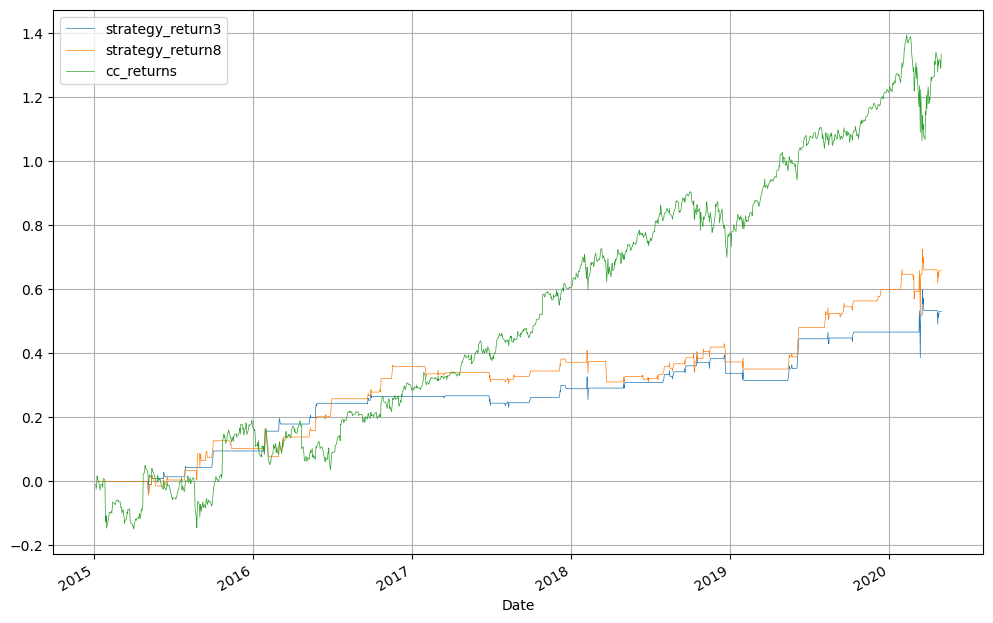

In [21]:
df1['strategy_return3'] = df1['strategy_return3'].cumsum()
df1['strategy_return8'] = df1['strategy_return8'].cumsum()
df1['cc_returns'] = df1['cc_returns'].cumsum()

df1[['strategy_return3', 'strategy_return8', 'cc_returns']].plot(grid = True, linewidth = 0.5, figsize = (12,8))

#### ‘ibs’ threshold of 0.8 gave good returns compare to ‘ibs’ threshold of 0.3. However, it is still less than buy and hold returns.

# Backtesting and Optimisation of Bollinger Band-Based Trading Strategy

## Objective
Designed and implemented a trading strategy based on Bollinger Bands to evaluate its performance compared to a simple buy-and-hold strategy.

## Approach
1. **Bollinger Band Calculation:**  
   - Created 20-day Bollinger Bands using the adjusted close prices with ±2 standard deviations.

2. **Buy Condition:**  
   - Entered a long position when the price crossed below the lower Bollinger Band.

3. **Sell Condition:**  
   - Exited the long position and entered a short position when the price crossed above the upper Bollinger Band.

4. **Continuous Positioning:**  
   - Ensured an open position at all times, alternating between long and short positions based on the crossing conditions.

5. **Backtesting:**  
   - Calculated cumulative returns for the Bollinger Band strategy and compared them against the returns of a simple buy-and-hold strategy.

## Outcome
Analysed and compared the performance of the Bollinger Band strategy with the buy-and-hold approach, providing insights into the effectiveness and profitability of each method.


In [24]:
df2 = df1_.copy()
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232849,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862888,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277805,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776836,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946995,29645200


In [25]:
sma = 20
df2['cc_return'] = df2['Adj Close'].pct_change()
df2['sma20'] = df2['Adj Close'].rolling(window = sma).mean()
df2['std_dev'] = df2['Adj Close'].rolling(window = sma).std()
df2['upperBB'] = df2['sma20'] + 2 * df2['std_dev']
df2['lowerBB'] = df2['sma20'] - 2 * df2['std_dev']

In [26]:
df2.tail();

In [27]:
df2['signal'] = np.where(df2['Adj Close'] < df2['lowerBB'], 1, 0)

In [28]:
df2['signal'] = np.where(df2['Adj Close'] > df2['upperBB'], -1, df2['signal'])

In [29]:
df2['signal'] = df2['signal'].shift(1)

In [30]:
df2['position'] = df2['signal'].replace(to_replace = 0, method = 'ffill')

In [31]:
df2.tail(20);

In [32]:
df2['position'].value_counts()

position
-1.0    805
 1.0    515
Name: count, dtype: int64

In [33]:
#df2['position'].plot()

In [34]:
df2['strategy_return'] = df2['cc_return'] * df2['position']

In [35]:
df2['strategy_return'] = 1 + df2['strategy_return']

In [36]:
df2['cc_return'] = 1 + df2['cc_return']

<Axes: xlabel='Date'>

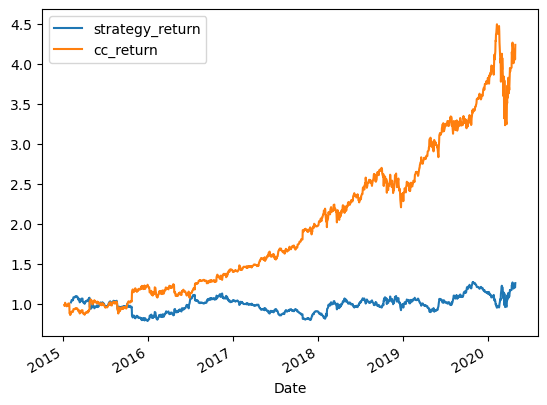

In [37]:
df2[['strategy_return', 'cc_return']].cumprod().plot()

In [38]:
print('Buy and hold returns:', np.round(df2['cc_return'].cumprod()[-1]-1,2))
print('Strategy returns:', np.round(df2['strategy_return'].cumprod()[-1]-1,2))

Buy and hold returns: 3.24
Strategy returns: 0.26


#### Buy and hold will give more returns than Strategy returns here.